<a href="https://colab.research.google.com/github/rhiju/rna_lores2/blob/main/0_Simple_1D_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting exponent of a polynomial; very simple 1D fit.
Adapted from
 https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b

In [280]:


import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2)))

def forward(x, e):
    """Forward pass for our fuction"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 100 # number of examples
learning_rate = 5e-7

# Model parameters
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)
y = forward(x, exp)
y += 10.0* torch.randn(n)

# Optimizer (NEW)
opt = torch.optim.SGD([exp_hat], lr=learning_rate, momentum=0.9)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 2000):
    opt.zero_grad()
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.item())
    exp_history.append(exp_hat.item())
    
    # Update model parameters
    loss.backward()
    opt.step()
    if (i%100 == 0):
      print("Iteration %d" % i)
      print("loss = %s" % loss.item())
      print("exp = %s" % exp_hat.item())


Iteration 0
loss = 3415.465576171875
exp = 3.9962024688720703
Iteration 100
loss = 284.4277648925781
exp = 2.918306589126587
Iteration 200
loss = 135.58291625976562
exp = 2.64265513420105
Iteration 300
loss = 80.78827667236328
exp = 2.475632429122925
Iteration 400
loss = 52.114959716796875
exp = 2.3549914360046387
Iteration 500
loss = 34.69593811035156
exp = 2.261051654815674
Iteration 600
loss = 23.411561965942383
exp = 2.1854686737060547
Iteration 700
loss = 16.193899154663086
exp = 2.1249895095825195
Iteration 800
loss = 12.12636661529541
exp = 2.0795297622680664
Iteration 900
loss = 10.340106964111328
exp = 2.049384832382202
Iteration 1000
loss = 9.72301959991455
exp = 2.0316667556762695
Iteration 1100
loss = 9.530664443969727
exp = 2.0217740535736084
Iteration 1200
loss = 9.471109390258789
exp = 2.016268730163574
Iteration 1300
loss = 9.45233154296875
exp = 2.0131773948669434
Iteration 1400
loss = 9.446304321289062
exp = 2.0114259719848633
Iteration 1500
loss = 9.44434642791748
ex

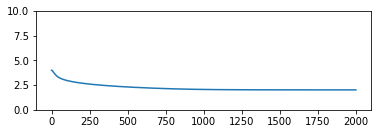

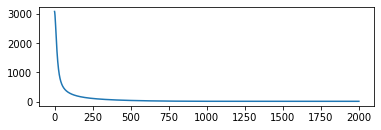

In [69]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(exp_history)
plt.ylim(0, 10)
plt.show()
plt.subplot(2,1,2)
plt.plot(loss_history)

Fit should look good!

tensor([1.9961], requires_grad=True)


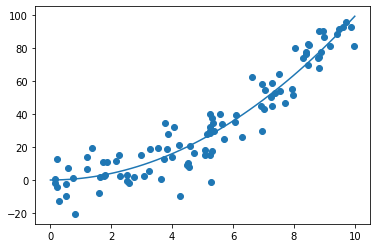

In [197]:

plt.scatter( x, y)
x_fine = Variable(torch.linspace(0,10,50), requires_grad=False)
y_fine = forward( x_fine, exp_hat )
print( exp_hat )
plt.plot(x_fine,y_fine.detach().numpy())
plt.show()


More of a challenge -- can we fit a (jittered) Gaussian?

tensor([6.3402, 3.0526, 3.9059], requires_grad=True)


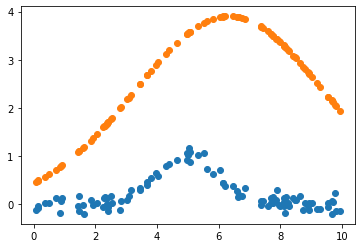

In [323]:
def forward_gaussian(x, params):
    """Forward pass for our fuction"""
    return params[2] * torch.exp( -(1/2)*((x - params[0])/params[1])**2 )

# Let's define some settings
n = 100 # number of examples


# Model definition
p = torch.Tensor( [5,1,1] )
x = Variable(torch.rand(n) * 10, requires_grad=False)
y = forward_gaussian(x, p)
y += 0.1* torch.randn(n)

plt.scatter(x,y)

# fit?
p_init = Variable(torch.Tensor( 10.0 * torch.rand(3) ), requires_grad=True)
print(p_init)
y_hat = forward_gaussian(x, p_init)
plt.scatter(x,y_hat.detach().numpy())

Iteration 0
loss = 2.568636178970337
tensor([6.3361, 3.0319, 3.8703], requires_grad=True)
Iteration 1000
loss = 0.10196183621883392
tensor([4.9856, 0.9835, 1.0263], requires_grad=True)
Iteration 2000
loss = 0.10196183621883392
tensor([4.9856, 0.9835, 1.0263], requires_grad=True)
Iteration 3000
loss = 0.10196183621883392
tensor([4.9856, 0.9835, 1.0263], requires_grad=True)
Iteration 4000
loss = 0.10196183621883392
tensor([4.9856, 0.9835, 1.0263], requires_grad=True)
Iteration 5000
loss = 0.10196183621883392
tensor([4.9856, 0.9835, 1.0263], requires_grad=True)
Iteration 6000
loss = 0.10196183621883392
tensor([4.9856, 0.9835, 1.0263], requires_grad=True)
Iteration 7000
loss = 0.10196183621883392
tensor([4.9856, 0.9835, 1.0263], requires_grad=True)
Iteration 8000
loss = 0.10196183621883392
tensor([4.9856, 0.9835, 1.0263], requires_grad=True)
Iteration 9000
loss = 0.10196183621883392
tensor([4.9856, 0.9835, 1.0263], requires_grad=True)


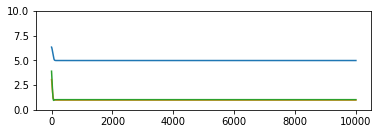

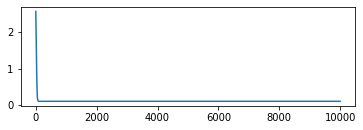

In [324]:
p_hat = Variable(p_init.clone(), requires_grad=True)

# Optimizer (NEW)
learning_rate = 5e-2

opt = torch.optim.SGD([p_hat], lr=learning_rate, momentum=0.5)
#opt = torch.optim.Adagrad([p_hat], lr=learning_rate)

loss_history = []
p_history = []

# Training loop
for i in range(0, 10000):
    opt.zero_grad()
    
    # Compute current estimate
    y_hat = forward_gaussian(x, p_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.item())
    p_history.append(p_hat.detach().numpy().copy())
    
    # Update model parameters
    loss.backward()
    opt.step()
    if (i%1000 == 0):
      print("Iteration %d" % i)
      print("loss = %s" % loss.item())
      print(p_hat)

plt.subplot(2,1,1)
plt.plot(p_history)
plt.ylim(0, 10)
plt.show()
plt.subplot(2,1,2)
plt.plot(loss_history)

Answer: yes -- but have to tweak learning rates and have a good initial guess!

tensor([4.9856, 0.9835, 1.0263], requires_grad=True)


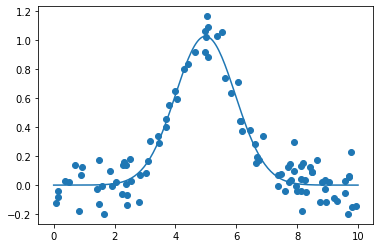

In [325]:
plt.scatter( x, y)
x_fine = Variable(torch.linspace(0,10,200), requires_grad=False)
y_fine = forward_gaussian( x_fine, p_hat )
print( p_hat )
plt.plot(x_fine,y_fine.detach().numpy())
plt.show()


In [326]:
for i in range(5):
  print( p_history[i] )
print( len( p_history) )

[6.3402123 3.0526388 3.905934 ]
[6.3360744 3.0318668 3.8703191]
[6.3297563 3.0006866 3.8170116]
[6.322183  2.9642708 3.755033 ]
[6.3137903 2.9252021 3.6889277]
10000


Following two code blocks give some practice in making a movie in matplotlib

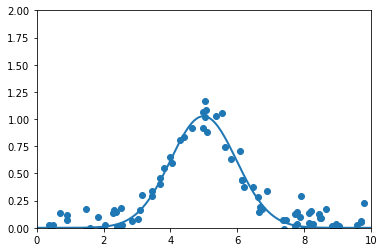

In [327]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
plt.scatter( x, y)
ax.set_xlim(( 0, 10))
ax.set_ylim((0, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x_fine = Variable(torch.linspace(0,10,200), requires_grad=False)
    y_fine = forward_gaussian( x_fine, p_history[20*i] )
    line.set_data(x_fine.numpy(), y_fine.numpy())
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())

How about fitting a deep Relu-based neural network? 

Following based partially on https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

In [328]:

def train_model(x,y,net,opt,niter=10000):
  x_fit = torch.unsqueeze(x,dim=1)
  y_target = torch.unsqueeze(y,dim=1)
  loss_history = []

  # Training loop
  for i in range(niter):
    opt.zero_grad()
    
    # Compute current estimate
    prediction = net(x_fit)
    loss = rmse(prediction, y_target)   
     
    # Do some recordings for plots
    loss_history.append(loss.item())
    #p_history.append(p_hat.detach().numpy().copy())
    
    # Update model parameters
    loss.backward()
    opt.step()
    if (i%1000 == 0):
      print("Iteration %d" % i,)
      print("loss = %s" % loss.item())

  plt.subplot(2,1,1)
  plt.plot(loss_history)

  plt.subplot(2,1,2)
  plt.scatter(x,y.detach().numpy())
  x_fine = Variable(torch.linspace(0,10,200), requires_grad=False)
  x_fine = torch.unsqueeze( x_fine,dim=1) 
  y_fine = net( x_fine )
  plt.plot(x_fine,y_fine.detach())
  print( net.parameters() )

Iteration 0
loss = 0.6506519317626953
Iteration 1000
loss = 0.10605815798044205
Iteration 2000
loss = 0.10471247136592865
Iteration 3000
loss = 0.10419288277626038
Iteration 4000
loss = 0.10386976599693298
Iteration 5000
loss = 0.10233356058597565
Iteration 6000
loss = 0.10129152983427048
Iteration 7000
loss = 0.10092367231845856
Iteration 8000
loss = 0.10063023865222931
Iteration 9000
loss = 0.10039833933115005
<generator object Module.parameters at 0x7f85d9b12d58>


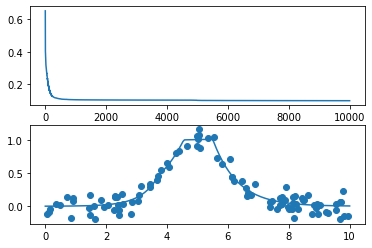

In [329]:
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        x = torch.exp(x)
        return x

#loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network

learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)

train_model(x,y,net,opt)


Let's create a data set that is more challenging -- multiple Gaussian peaks.

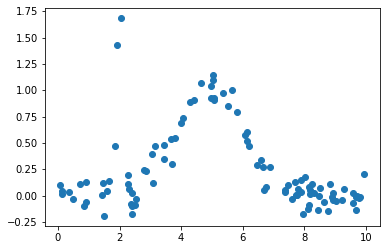

In [330]:
y2 = forward_gaussian(x, torch.tensor([2,0.1,2]) )+ forward_gaussian(x,[5,1,1])
y2 += 0.1* torch.randn(n)
plt.scatter(x,y2)

Iteration 0
loss = 0.8984338045120239
Iteration 1000
loss = 0.3373429477214813
Iteration 2000
loss = 0.3371569514274597
Iteration 3000
loss = 0.3371359407901764
Iteration 4000
loss = 0.3371322453022003
Iteration 5000
loss = 0.33713123202323914
Iteration 6000
loss = 0.3371293246746063
Iteration 7000
loss = 0.33713024854660034
Iteration 8000
loss = 0.33712896704673767
Iteration 9000
loss = 0.337127685546875
<generator object Module.parameters at 0x7f85d9ca02b0>


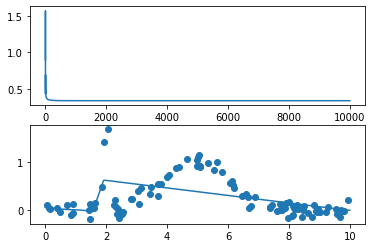

In [331]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.ReLU(),
        torch.nn.Linear(20, 1),
    )
learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)
train_model(x,y2,net,opt)

Iteration 0
loss = 0.5471477508544922
Iteration 1000
loss = 0.2512850761413574
Iteration 2000
loss = 0.22438602149486542
Iteration 3000
loss = 0.20600242912769318
Iteration 4000
loss = 0.19369515776634216
Iteration 5000
loss = 0.1825144737958908
Iteration 6000
loss = 0.17274044454097748
Iteration 7000
loss = 0.16503643989562988
Iteration 8000
loss = 0.15767067670822144
Iteration 9000
loss = 0.15269309282302856
Iteration 10000
loss = 0.14784452319145203
Iteration 11000
loss = 0.14386367797851562
Iteration 12000
loss = 0.14025616645812988
Iteration 13000
loss = 0.1374252587556839
Iteration 14000
loss = 0.1351102739572525
Iteration 15000
loss = 0.1326572299003601
Iteration 16000
loss = 0.1306663453578949
Iteration 17000
loss = 0.12873081862926483
Iteration 18000
loss = 0.12697412073612213
Iteration 19000
loss = 0.12497102469205856
<generator object Module.parameters at 0x7f85d9ca04c0>


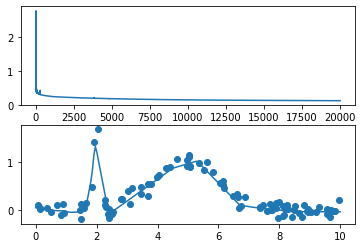

In [332]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(20, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 1),
    )
learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)
train_model(x,y2,net,opt,20000)

Even harder -- 4 Gaussians

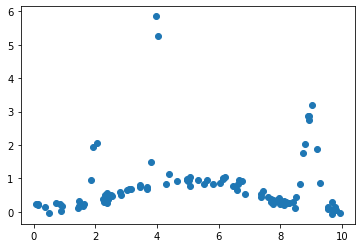

In [343]:
y3 = forward_gaussian(x, torch.tensor([2,0.1,2]) )+ forward_gaussian(x,[5,2,1]) + forward_gaussian(x, torch.tensor([4,0.1,5]))+forward_gaussian(x, torch.tensor([9,0.2,3]) )
y3 += 0.1* torch.randn(n)
plt.scatter(x,y3)

This fitting problem is impossible for single layer NN

Iteration 0
loss = 2.3479881286621094
Iteration 1000
loss = 0.8736760020256042
Iteration 2000
loss = 0.8651277422904968
Iteration 3000
loss = 0.8542529344558716
Iteration 4000
loss = 0.8475580215454102
Iteration 5000
loss = 0.8427165150642395
Iteration 6000
loss = 0.8387426733970642
Iteration 7000
loss = 0.8352997899055481
Iteration 8000
loss = 0.8322075605392456
Iteration 9000
loss = 0.8293583989143372
<generator object Module.parameters at 0x7f85d85650f8>


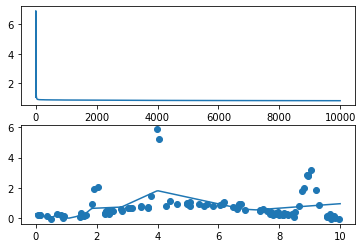

In [345]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 1),
    )
learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)
train_model(x,y3,net,opt)

But its within reach of a 2-layer NN

Iteration 0
loss = 1.1564594507217407
Iteration 1000
loss = 0.872823178768158
Iteration 2000
loss = 0.8643032312393188
Iteration 3000
loss = 0.8434626460075378
Iteration 4000
loss = 0.8361644744873047
Iteration 5000
loss = 0.8336700797080994
Iteration 6000
loss = 0.8306252956390381
Iteration 7000
loss = 0.8291360139846802
Iteration 8000
loss = 0.828275740146637
Iteration 9000
loss = 0.8281446099281311
<generator object Module.parameters at 0x7f85d8565308>


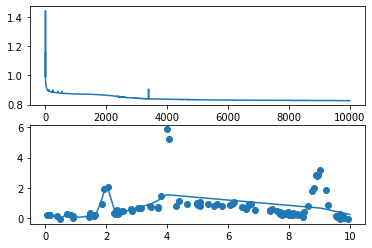

In [346]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(20, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 1),
    )
learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)
train_model(x,y3,net,opt,10000)

More channels in the 2 hidden-layer net -- works better!

Iteration 0
loss = 2.1045095920562744
Iteration 1000
loss = 0.8199440240859985
Iteration 2000
loss = 0.7298867702484131
Iteration 3000
loss = 0.6526143550872803
Iteration 4000
loss = 0.5782930254936218
Iteration 5000
loss = 0.5359084606170654
Iteration 6000
loss = 0.492371141910553
Iteration 7000
loss = 0.45540061593055725
Iteration 8000
loss = 0.4157325029373169
Iteration 9000
loss = 0.3808887302875519
Iteration 10000
loss = 0.351757287979126
Iteration 11000
loss = 0.32332301139831543
Iteration 12000
loss = 0.29972773790359497
Iteration 13000
loss = 0.2735322117805481
Iteration 14000
loss = 0.25907599925994873
Iteration 15000
loss = 0.23980724811553955
Iteration 16000
loss = 0.224985271692276
Iteration 17000
loss = 0.2088298797607422
Iteration 18000
loss = 0.19539880752563477
Iteration 19000
loss = 0.18071024119853973
<generator object Module.parameters at 0x7f85d80208e0>


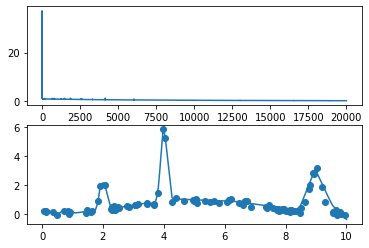

In [349]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )
learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)
train_model(x,y3,net,opt,20000)

Three-layer net works even better!

Iteration 0
loss = 1.010724663734436
Iteration 1000
loss = 0.6169629096984863
Iteration 2000
loss = 0.41283127665519714
Iteration 3000
loss = 0.31028738617897034
Iteration 4000
loss = 0.22376254200935364
Iteration 5000
loss = 0.1962101310491562
Iteration 6000
loss = 0.1895897090435028
Iteration 7000
loss = 0.18635696172714233
Iteration 8000
loss = 0.18010301887989044
Iteration 9000
loss = 0.17993058264255524
Iteration 10000
loss = 0.18039122223854065
Iteration 11000
loss = 0.1795852929353714
Iteration 12000
loss = 0.17862117290496826
Iteration 13000
loss = 0.1792255938053131
Iteration 14000
loss = 0.17654666304588318
Iteration 15000
loss = 0.17598460614681244
Iteration 16000
loss = 0.17533546686172485
Iteration 17000
loss = 0.17320318520069122
Iteration 18000
loss = 0.16607783734798431
Iteration 19000
loss = 0.16348744928836823
<generator object Module.parameters at 0x7f85d8784150>


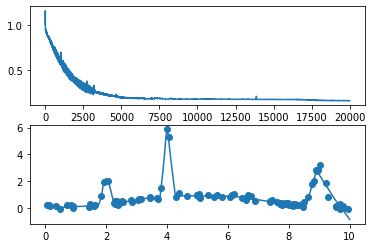

In [350]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(20, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 1),
    )
learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)
train_model(x,y3,net,opt,20000)

Next up -- need to learn how to do batches.
OK, figure out how to do batches -- final results look worse, though! May need to run for much longer.

In [373]:
import torch.utils.data as Data

def train_model_batch(x,y,net,opt,batch_size=100,num_epochs=200):
  torch_dataset = Data.TensorDataset(torch.unsqueeze(x,dim=1), torch.unsqueeze(y3,dim=1))

  loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

  loss_history = []
  # start training
  for epoch in range(num_epochs):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        opt.zero_grad()
        # Compute current estimate
        prediction = net(b_x)
        loss = rmse(prediction, b_y)   
     
        # Do some recordings for plots
        loss_history.append(loss.item())
    
        # Update model parameters
        loss.backward()
        opt.step()
        if (step%100 == 0 and epoch%100 == 0):
          print("Iteration %d, Epoch %d" % (step,epoch) )
          print("loss = %s" % loss.item())

  plt.subplot(2,1,1)
  plt.plot(loss_history)

  plt.subplot(2,1,2)
  plt.scatter(x,y.detach().numpy())
  x_fine = Variable(torch.linspace(0,10,200), requires_grad=False)
  x_fine = torch.unsqueeze( x_fine,dim=1) 
  y_fine = net( x_fine )
  plt.plot(x_fine,y_fine.detach())
  print( net.parameters() )


Iteration 0, Epoch 0
loss = 1.1276664733886719
Iteration 0, Epoch 100
loss = 0.8815456628799438
Iteration 0, Epoch 200
loss = 0.8658756017684937
Iteration 0, Epoch 300
loss = 0.8487903475761414
Iteration 0, Epoch 400
loss = 0.8158764243125916
Iteration 0, Epoch 500
loss = 0.8179120421409607
Iteration 0, Epoch 600
loss = 0.7381014227867126
Iteration 0, Epoch 700
loss = 0.7188877463340759
Iteration 0, Epoch 800
loss = 0.7363153100013733
Iteration 0, Epoch 900
loss = 0.7032409906387329
Iteration 0, Epoch 1000
loss = 0.677316427230835
Iteration 0, Epoch 1100
loss = 0.6394706964492798
Iteration 0, Epoch 1200
loss = 0.6226131319999695
Iteration 0, Epoch 1300
loss = 0.5996204614639282
Iteration 0, Epoch 1400
loss = 0.5774065852165222
Iteration 0, Epoch 1500
loss = 0.5464435815811157
Iteration 0, Epoch 1600
loss = 0.5285104513168335
Iteration 0, Epoch 1700
loss = 0.5250169634819031
Iteration 0, Epoch 1800
loss = 0.48125654458999634
Iteration 0, Epoch 1900
loss = 0.46054285764694214
<generator 

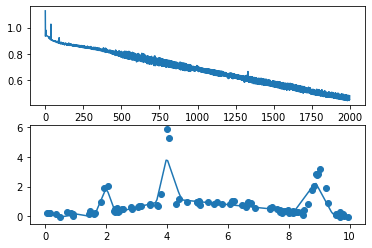

In [377]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(20, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 1),
    )
learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)
train_model_batch(x,y3,net,opt,batch_size=50,num_epochs=2000)